In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import scipy.stats as st
import re
import csv
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('C:/Users/dell/Desktop/statitics project innomatics/aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

# how many rows and columns are in the dataset

In [5]:
df.shape

(3998, 38)

In [6]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# head(): is used for starting rows

In [7]:
df.head(10)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,1027655,300000,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,912934,400000,2014-07-01,2015-07-01 00:00:00,mechanical engineer,Bangalore,m,1992-05-27,92.00,cbse,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,552574,600000,2013-07-01,present,electrical engineer,Noida,m,1991-09-17,90.00,cbse,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,1203363,230000,2014-07-01,present,project engineer,Kolkata,m,1993-06-13,77.00,cbse,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


# tail():is used for ending rows

In [8]:
df.tail(8)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3990,204287,480000,2012-02-01,present,senior systems engineer,Hyderabad,f,1989-09-04,88.00,0,...,-1,-1,-1,233,-1,0.6646,0.3448,0.3817,-1.34780,0.8183
3991,230873,630000,2011-07-01,2014-10-01 00:00:00,systems analyst,Bangalore,m,1990-05-20,80.00,state board,...,-1,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284
3992,344407,800000,2014-04-01,2015-04-01 00:00:00,manager,Rajkot,m,1990-06-22,73.00,0,...,-1,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,cbse,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


# identifying null values in data set

In [9]:
df.isnull().sum(0) #it is for rows      rows:horizontal(-)

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [10]:
df.isnull().sum(1) #it is for columns      column:vertical(|)

0       0
1       0
2       0
3       0
4       0
       ..
3993    0
3994    0
3995    0
3996    0
3997    0
Length: 3998, dtype: int64

# duplicate is used for:in our data set ,if we have any duplicate values.

In [11]:
df.duplicated().sum()

0

# how many values in the data set

In [12]:
df.ID.value_counts()

203097     1
283847     1
1118955    1
327371     1
587792     1
          ..
355018     1
806160     1
102065     1
462964     1
324966     1
Name: ID, Length: 3998, dtype: int64

In [13]:
df.Salary.value_counts()

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64

In [14]:
df.DOL.value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

In [15]:
df.ComputerScience.value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 223      14
 592      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

In [16]:
df.replace(-1,0,inplace=True)

In [17]:
df.ComputerScience.value_counts()

0      3096
407     128
376     123
346     118
438     111
469      80
315      77
500      64
284      50
530      45
253      30
561      22
223      14
592      14
623      10
653       9
192       3
715       2
684       1
130       1
Name: ComputerScience, dtype: int64

In [18]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [19]:
df.MechanicalEngg.value_counts()

0      3763
366      20
446      16
438      15
420      14
376      13
313      13
393      13
407      12
346      11
469      10
473      10
553       8
435       7
383       6
340       6
526       5
409       5
286       5
500       4
253       4
284       3
332       3
538       3
254       3
580       3
616       2
564       2
606       2
223       2
512       2
561       2
260       2
358       1
280       1
315       1
233       1
306       1
461       1
180       1
206       1
623       1
Name: MechanicalEngg, dtype: int64

In [20]:
df.ElectricalEngg.value_counts()

0      3837
420      16
446      14
388      10
473      10
452      10
356       9
500       8
580       8
366       7
324       7
393       7
553       6
313       6
516       5
260       4
292       4
340       3
228       3
526       3
484       3
633       3
548       2
433       2
606       2
612       2
660       2
286       2
676       1
411       1
206       1
Name: ElectricalEngg, dtype: int64

In [21]:
df.TelecomEngg.value_counts()

0      3624
393      45
366      43
260      35
313      34
340      32
286      31
420      26
446      16
388      14
233      14
473      13
292      13
356      12
324      11
206       8
500       5
526       5
516       4
484       4
228       3
548       2
153       1
196       1
164       1
452       1
Name: TelecomEngg, dtype: int64

In [22]:
df.CivilEngg.value_counts()

0      3956
356       6
292       6
388       4
260       3
320       3
500       2
300       2
340       2
516       1
460       1
420       1
280       1
433       1
380       1
452       1
277       1
166       1
322       1
200       1
440       1
400       1
480       1
Name: CivilEngg, dtype: int64

In [23]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,91.516758,23.915958,17.438469,32.757629,3.673337,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,174.867677,97.893295,87.394072,104.568796,36.559052,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [24]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [25]:
df.columns.value_counts()

ID                       1
ComputerScience          1
GraduationYear           1
English                  1
Logical                  1
Quant                    1
Domain                   1
ComputerProgramming      1
ElectronicsAndSemicon    1
MechanicalEngg           1
Salary                   1
ElectricalEngg           1
TelecomEngg              1
CivilEngg                1
conscientiousness        1
agreeableness            1
extraversion             1
nueroticism              1
CollegeState             1
CollegeCityTier          1
CollegeCityID            1
collegeGPA               1
DOJ                      1
DOL                      1
Designation              1
JobCity                  1
Gender                   1
DOB                      1
10percentage             1
10board                  1
12graduation             1
12percentage             1
12board                  1
CollegeID                1
CollegeTier              1
Degree                   1
Specialization           1
o

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [27]:
df['JobCity'].value_counts()

Bangalore           627
0                   461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [28]:
df['JobCity'].replace(0,'Unknown',inplace=True)

In [29]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [30]:
df['JobCity'].value_counts()

Bangalore           627
Unknown             461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [31]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [32]:
df['Salary'].value_counts()

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64

In [33]:
df['DOJ'].value_counts()

2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
             ... 
2015-11-01      1
2009-11-01      1
2004-08-01      1
2009-09-01      1
2007-02-01      1
Name: DOJ, Length: 81, dtype: int64

In [34]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [35]:
df[df['Designation']=='get']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
332,597966,180000,2013-08-01,2014-03-01 00:00:00,get,Unknown,m,1990-08-02,91.80,cbse,...,0,553,0,0,0,-0.1590,0.8784,0.3174,0.27270,0.4805
350,38162,340000,2010-07-01,2011-05-01 00:00:00,get,Faridabad,m,1988-08-13,67.67,up board,...,0,0,0,0,0,-1.9629,-1.0593,-0.7794,-0.17270,-0.1295
1717,330551,145000,2012-10-01,2013-01-01 00:00:00,get,Hyderabad,m,1991-07-29,80.00,ssc,...,0,306,0,0,0,1.5533,1.7488,1.6880,-1.14220,0.1864
1897,1064862,175000,2014-05-01,present,get,Hyderabad,m,1991-02-04,87.00,state board,...,0,346,0,0,0,1.5644,-1.1196,0.4711,1.16010,0.4805
2140,796296,600000,2014-06-01,present,get,Indore,m,1992-01-05,91.20,cbse,...,0,420,0,0,0,-1.4517,0.0459,-1.6807,0.90660,0.0973
2318,1094242,220000,2014-07-01,present,get,Lucknow,m,1992-02-06,80.20,cbse,...,0,0,580,0,0,1.4208,1.0449,-0.4511,0.01920,0.6721
2443,1259589,110000,2014-10-01,2015-04-01 00:00:00,get,kharagpur,m,1993-03-18,80.00,icse,...,0,346,0,0,0,-0.4463,-0.9531,0.1637,0.01920,-2.0105
2666,110817,200000,2010-03-01,2011-03-01 00:00:00,get,Hyderabad,m,1989-05-15,80.00,ssc,...,0,0,0,0,0,-0.4173,0.3448,0.3817,-0.64280,0.9763
2757,1083682,350000,2015-01-01,present,get,Nashik,m,1994-01-17,90.60,cbse,...,0,500,0,0,0,0.1282,0.2124,-1.2196,-0.99500,-0.2859


In [36]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [37]:
df['10board'].replace(0,'Unknown',inplace=True) 

In [38]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [39]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
Unknown                        350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [40]:
df['DOJ'].value_counts()

2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
             ... 
2015-11-01      1
2009-11-01      1
2004-08-01      1
2009-09-01      1
2007-02-01      1
Name: DOJ, Length: 81, dtype: int64

# cleaning data of DOJ

In [41]:
df['DOJ']=df['DOJ'].apply(lambda x: str(x).split('-')[0])
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [42]:
df['DOB'].value_counts()

1991-01-01    11
1991-07-15    10
1991-07-05     8
1991-12-13     8
1991-06-03     8
              ..
1992-12-30     1
1986-10-20     1
1989-11-17     1
1992-09-30     1
1987-04-15     1
Name: DOB, Length: 1872, dtype: int64

# cleaning data of DOB

In [43]:
df['DOB']=df['DOB'].apply(lambda x: str(x).split('-')[0])
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015-03-01 00:00:00,get,Manesar,m,1991,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012-10-01 00:00:00,software engineer,New Delhi,m,1987,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [44]:
df['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

# Cleaning data of DOL

In [45]:
df['DOL']=df['DOL'].apply(lambda x: str(x).split('-')[0])
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [46]:
df['DOL'].value_counts()

present    1875
2015       1059
2014        646
2013        255
2012        116
2011         40
2010          4
2005          1
2009          1
2008          1
Name: DOL, dtype: int64

In [47]:
df['10percentage'].value_counts()

78.00    76
82.00    71
85.00    67
76.00    66
80.00    65
         ..
82.56     1
87.04     1
81.14     1
61.75     1
78.72     1
Name: 10percentage, Length: 851, dtype: int64

In [48]:
df['12percentage'].value_counts()

70.00    72
72.00    68
74.00    63
62.00    58
68.00    58
         ..
58.50     1
74.45     1
95.41     1
83.58     1
82.55     1
Name: 12percentage, Length: 801, dtype: int64

In [49]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

In [50]:
df['12board'].value_counts()

cbse                                1400
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [51]:
df['12board'].replace(0,'Unknown',inplace=True) 

In [52]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [53]:
df['12board'].value_counts()

cbse                                1400
state board                         1254
Unknown                              359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [54]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [55]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [56]:
df['collegeGPA'].value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
71.00     75
        ... 
71.68      1
73.15      1
90.01      1
71.36      1
70.42      1
Name: collegeGPA, Length: 1282, dtype: int64

In [57]:
df['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [58]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [59]:
df['Domain'].value_counts()

0.000000    246
0.622643    113
0.538387    110
0.486747    106
0.744758    103
           ... 
0.999250      1
0.010995      1
0.639587      1
0.031150      1
0.938588      1
Name: Domain, Length: 243, dtype: int64

# nunique is used for:how many values(value count) are there in the data set.

In [60]:
df['10board'].nunique()

275

# unique is used for:incase we are having 2 or more number of stateboard ,it will print only once from the dataset.

In [61]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'Unknown', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  educatio

In [62]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'Unknown', 'bseb', 'chse',
       'puc', ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermed

In [63]:
df['12board'].nunique()

340

In [64]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [65]:
df[df['Designation'] =='get']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
332,597966,180000,2013,2014,get,Unknown,m,1990,91.80,cbse,...,0,553,0,0,0,-0.1590,0.8784,0.3174,0.27270,0.4805
350,38162,340000,2010,2011,get,Faridabad,m,1988,67.67,up board,...,0,0,0,0,0,-1.9629,-1.0593,-0.7794,-0.17270,-0.1295
1717,330551,145000,2012,2013,get,Hyderabad,m,1991,80.00,ssc,...,0,306,0,0,0,1.5533,1.7488,1.6880,-1.14220,0.1864
1897,1064862,175000,2014,present,get,Hyderabad,m,1991,87.00,state board,...,0,346,0,0,0,1.5644,-1.1196,0.4711,1.16010,0.4805
2140,796296,600000,2014,present,get,Indore,m,1992,91.20,cbse,...,0,420,0,0,0,-1.4517,0.0459,-1.6807,0.90660,0.0973
2318,1094242,220000,2014,present,get,Lucknow,m,1992,80.20,cbse,...,0,0,580,0,0,1.4208,1.0449,-0.4511,0.01920,0.6721
2443,1259589,110000,2014,2015,get,kharagpur,m,1993,80.00,icse,...,0,346,0,0,0,-0.4463,-0.9531,0.1637,0.01920,-2.0105
2666,110817,200000,2010,2011,get,Hyderabad,m,1989,80.00,ssc,...,0,0,0,0,0,-0.4173,0.3448,0.3817,-0.64280,0.9763
2757,1083682,350000,2015,present,get,Nashik,m,1994,90.60,cbse,...,0,500,0,0,0,0.1282,0.2124,-1.2196,-0.99500,-0.2859


# shape is used for how many rows,columns in our data set

In [66]:
df.shape

(3998, 38)

In [67]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,cbse,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,state board,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,"bse,odisha",...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,state board,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [68]:
  df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

# cleaning data of 10board

In [69]:
board_10=[]
for val in df['10board']:
    if val=='cbse':
        board_10.append('central board')
    elif val=='icse':
        board_10.append('icse')
    else:
        board_10.append('stateboard')

In [70]:
df['10board']=board_10

In [71]:
df['10board'].value_counts()

stateboard       2322
central board    1395
icse              281
Name: 10board, dtype: int64

In [72]:
 df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,stateboard,...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,central board,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,central board,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,central board,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,central board,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,central board,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,stateboard,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,stateboard,...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,stateboard,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# cleaning data of 12board

In [73]:
board_12=[]
for val in df['12board']:
    if val=='cbse':
        board_12.append('central board')
    elif val=='icse':
        board_12.append('icse')
    else:
        board_12.append('stateboard')

In [74]:
df.iloc[:,9:24]

,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical
0,stateboard,2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585
1,central board,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610
2,central board,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545
3,central board,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585
4,central board,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,central board,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334
3994,stateboard,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410
3995,stateboard,2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475
3996,stateboard,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410


In [75]:
df['12board']=board_12

In [76]:
df['12board'].value_counts()

stateboard       2469
central board    1400
icse              129
Name: 12board, dtype: int64

# in Specialization 

In [77]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [78]:
df['Specialization'].nunique()

46

# droping the columns in the data set:

In [79]:
df.drop("CollegeTier",axis=1,inplace=True)

In [80]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,present,senior quality engineer,Bangalore,f,1990,84.30,stateboard,...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,present,assistant manager,Indore,m,1989,85.40,central board,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,present,systems engineer,Chennai,f,1992,85.00,central board,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,present,senior software engineer,Gurgaon,m,1989,85.60,central board,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015,get,Manesar,m,1991,78.00,central board,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,central board,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,stateboard,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013,present,associate software engineer,Bangalore,m,1991,81.86,stateboard,...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,stateboard,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [81]:
df.iloc[:,9:21]

,10board,12graduation,12percentage,12board,CollegeID,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear
0,stateboard,2007,95.80,stateboard,1141,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011
1,central board,2007,85.00,central board,5807,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012
2,central board,2010,68.20,central board,64,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014
3,central board,2007,83.60,central board,6920,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011
4,central board,2008,76.80,central board,11368,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,central board,2006,55.50,central board,6268,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010
3994,stateboard,2009,93.00,stateboard,4883,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013
3995,stateboard,2008,65.50,stateboard,9786,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012
3996,stateboard,2010,69.88,stateboard,979,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014


In [82]:
df.drop("CollegeID",axis=1,inplace=True)

In [83]:
df.iloc[:,12:23]

,12board,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant
0,stateboard,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525
1,central board,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780
2,central board,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370
3,central board,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625
4,central board,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465
...,...,...,...,...,...,...,...,...,...,...,...
3993,central board,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475
3994,stateboard,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535
3995,stateboard,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465
3996,stateboard,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320


In [84]:
df.drop("CollegeCityID",axis=1,inplace=True)

In [85]:
df.iloc[:,12:21]

,12board,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical
0,stateboard,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585
1,central board,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610
2,central board,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545
3,central board,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585
4,central board,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625
...,...,...,...,...,...,...,...,...,...
3993,central board,B.Tech/B.E.,information technology,61.50,0,Haryana,2010,365,334
3994,stateboard,B.Tech/B.E.,electronics and communication engineering,77.30,1,Telangana,2013,415,410
3995,stateboard,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012,475,475
3996,stateboard,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014,450,410


In [86]:
df.drop("CollegeCityTier",axis=1,inplace=True)

In [87]:
df.iloc[:,12:23]

,12board,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming
0,stateboard,B.Tech/B.E.,computer engineering,78.00,Andhra Pradesh,2011,515,585,525,0.635979,445
1,central board,B.Tech/B.E.,electronics and communication engineering,70.06,Madhya Pradesh,2012,695,610,780,0.960603,0
2,central board,B.Tech/B.E.,information technology,70.00,Uttar Pradesh,2014,615,545,370,0.450877,395
3,central board,B.Tech/B.E.,computer engineering,74.64,Delhi,2011,635,585,625,0.974396,615
4,central board,B.Tech/B.E.,electronics and communication engineering,73.90,Uttar Pradesh,2012,545,625,465,0.124502,0
...,...,...,...,...,...,...,...,...,...,...,...
3993,central board,B.Tech/B.E.,information technology,61.50,Haryana,2010,365,334,475,0.276047,345
3994,stateboard,B.Tech/B.E.,electronics and communication engineering,77.30,Telangana,2013,415,410,535,0.881620,325
3995,stateboard,B.Tech/B.E.,computer engineering,70.00,Orissa,2012,475,475,465,0.488348,405
3996,stateboard,B.Tech/B.E.,computer science & engineering,70.42,Karnataka,2014,450,410,320,0.744758,445


In [88]:
df.info() #here i have droped 4 columns from the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

# cleaning data of jobcity

In [89]:
df['JobCity'].value_counts()

Bangalore           627
Unknown             461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [90]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', 'Unknown',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurg

In [91]:
df['JobCity']=df['JobCity'].apply(lambda x:x.lower())

In [92]:
df['JobCity']=df['JobCity'].apply(lambda x:x.strip())

In [93]:
a=['alwar','am','ambala','ambala city'] #ambala
b=['asifabadbanglore','banagalore','banaglore','bangalore','banglore','bengaluru']#bengaluru
b1=['bhubaneshwar','bhubaneswar','bhubneshwar']#bhubaneswar 
c=['chennai','chennai & mumbai','chennai, bangalore']#chennai
d=['delhi','delhi/ncr','guragaon','gurga','gurgaon','gurgoan','new dehli','new delhi','new delhi - jaisalmer']#delhi
g=['gajiabaad','gaziabaad','ghaziabad',"indirapuram, ghaziabad"]#ghaziabad
h=['hderabad','hyderabad','hyderabad(bhadurpally)','secunderabad']#hyderabad
k=['kochi','kochi/cochin','kochi/cochin, chennai and coimbatore']#kochi
m=['navi mumbai','navi mumbai , hyderabad','mumbai']#mumbai
n=['noida','nouda','greater noida']#noida
p=['pondi','pondicherry','pondy']#pondicherry
v=['visakhapatnam','vizag','vsakhapttnam']#vizag

In [94]:
df['JobCity']=df['JobCity'].apply(lambda x:x.replace('gandhi nagar','gandhinagar'))

In [95]:
df['JobCity']=df['JobCity'].apply(lambda x:x.replace('kolkata`','kolkata'))

In [96]:
df['JobCity']=df['JobCity'].apply(lambda x:x.replace('muzzafarpur','muzaffarpur'))   

In [97]:
df['JobCity']=df['JobCity'].apply(lambda x:x.replace('punr','pune'))

In [98]:
df['JobCity']=df['JobCity'].apply(lambda x:x.replace('tirupathi','tirupati'))

In [99]:
df['JobCity']=df['JobCity'].apply(lambda x:x.replace('thiruvananthapuram','trivandrum'))

In [100]:
city=[]
for i in df['JobCity']:
    if i in a:
        city.append('ambala')
    elif i in b:
        city.append('bengaluru')
    elif i in b1:
        city.append('bhubaneswar')
    elif i in c:
        city.append('chennai')
    elif i in d:
        city.append('delhi')
    elif i in g:
        city.append('ghaziabad')
    elif i in h:
        city.append('hyderabad')
    elif i in k:
        city.append('kochi')
    elif i in m:
        city.append('mumbai')
    elif i in n:
        city.append('noida')
    elif i in p:
        city.append('pondicherry')
    elif i in v:
        city.append('vizag')
    else:
        city.append(i)

In [101]:
df['JobCity']=city

In [102]:
df['JobCity'].unique()

array(['bengaluru', 'indore', 'chennai', 'delhi', 'manesar', 'hyderabad',
       'noida', 'kolkata', 'pune', 'unknown', 'mohali', 'jhansi',
       'bhubaneswar', 'mumbai', 'mangalore', 'rewari', 'ghaziabad',
       'bhiwadi', 'mysore', 'rajkot', 'jaipur', 'thane', 'maharajganj',
       'trivandrum', 'punchkula', 'coimbatore', 'dhanbad', 'lucknow',
       'gandhinagar', 'una', 'daman and diu', 'vizag', 'nagpur',
       'bhagalpur', 'ahmedabad', 'kochi', 'bankura', 'kanpur',
       'vijayawada', 'beawar', 'ambala', 'siliguri', 'raipur', 'bhopal',
       'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur', 'bulandshahar',
       'haridwar', 'raigarh', 'jabalpur', 'unnao', 'aurangabad',
       'belgaum', 'dehradun', 'rudrapur', 'jamshedpur', 'dharamshala',
       'hissar', 'ranchi', 'madurai', 'chandigarh', 'australia',
       'cheyyar', 'sonepat', 'pantnagar', 'jagdalpur', 'angul', 'baroda',
       'ariyalur', 'jowai', 'neemrana', 'tirupati', 'calicut', 'dubai',
       'ahmednagar', 'nashik'

In [103]:
df['JobCity'].value_counts()

bengaluru                                 687
unknown                                   461
delhi                                     451
noida                                     419
hyderabad                                 373
                                         ... 
sadulpur,rajgarh,distt-churu,rajasthan      1
bundi                                       1
ncr                                         1
ganjam                                      1
haryana                                     1
Name: JobCity, Length: 190, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

# clenaing data of Specialization

In [105]:
ece=['telecommunication engineering','electronics','electronics & instrumentation eng','electronics & telecommunications','electronics and communication engineering','electronics and computer engineering','electronics and electrical engineering','electronics and instrumentation engineering','electronics engineering','embedded systems technology',]
mech=['instrumentation and control engineering','instrumentation engineering','internal combustion engine','mechanical & production engineering','mechanical and automation','mechanical engineering','mechatronics','metallurgical engineering',]
cs=['computer and communication engineering','computer application','computer engineering','computer science','computer science & engineering','computer science and technology','information & communication technology','information science','information science engineering','information technology',]

In [106]:
ece=['telecommunication engineering','electronics','electronics & instrumentation eng','electronics & telecommunications','electronics and communication engineering','electronics and computer engineering','electronics and electrical engineering','electronics and instrumentation engineering','electronics engineering','embedded systems technology',]
mech=['instrumentation and control engineering','instrumentation engineering','internal combustion engine','mechanical & production engineering','mechanical and automation','mechanical engineering','mechatronics','metallurgical engineering',]
sp=[]
for i in df['Specialization']:
    if i in cs:
        sp.append('CS')
    elif i in ece:
        sp.append('EC')
    elif i in mech:
        sp.append('MECH')
    else:
        sp.append('other')

In [107]:
df['specialization']=sp

In [108]:
df['specialization'].unique()

array(['CS', 'EC', 'MECH', 'other'], dtype=object)

In [109]:
df['specialization'].value_counts()

CS       2287
EC       1286
MECH      238
other     187
Name: specialization, dtype: int64

In [110]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

# CLENING DATA OF DESIGNATION

In [111]:
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('assistant system engineer trainee','assistant system engineer - trainee'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('associate software engg','associate software engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('business development managerde','business development manager'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('business systems analyst','business system analyst'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('co faculty','computer faculty'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('graduate trainee engineer','graduate engineer trainee'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('programmer analyst trainee','program analyst trainee'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('qa analyst','quality analyst'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('qa engineer','quality engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('sales and service engineer','sales & service engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('software devloper','software developer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('software engg','software engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('software eng','software engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('software engineere','software engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('software engineering associate','software engineer associate'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('software test engineerte','software test engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('systems administrator','system administrator'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('systems analyst','system analyst'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('systems engineer','system engineer'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('team leader','team lead'))
df['Designation'] = df['Designation'].apply(lambda x:str(x).replace('test engineer','testing engineer'))

In [112]:
df['Designation'].value_counts()

software engineerineer          540
system engineer                 323
software developer              266
programmer analyst              139
java software engineerineer     111
                               ... 
process control engineer          1
windows system administrator      1
senior project engineer           1
quality control inspector         1
jr. software developer            1
Name: Designation, Length: 400, dtype: int64

# cleaning the data of DOB(here we have taken the age)

In [113]:
df['age'] = df['DOB'].apply(lambda x:str(x).split('-')[0].split()[0])

In [114]:
df['age']=df['age'].astype(int)

In [115]:
df['age'] = 2015 - df['age']

In [116]:
df['age'].unique()

array([25, 26, 23, 24, 22, 28, 27, 29, 21, 38, 30, 20, 18, 32, 31, 34, 33])

In [117]:
df['age'].value_counts()

24    979
23    855
25    774
26    522
27    308
22    299
28    116
29     62
21     31
30     28
31     13
32      4
20      2
33      2
38      1
18      1
34      1
Name: age, dtype: int64

In [118]:
df.drop("specialization",axis=1,inplace=True)

In [119]:
df['DOL'].value_counts()

present    1875
2015       1059
2014        646
2013        255
2012        116
2011         40
2010          4
2005          1
2009          1
2008          1
Name: DOL, dtype: int64

In [120]:
df['DOL'] = df['DOL'].apply(lambda x:x.replace('present','2016'))

In [121]:
df['DOL'].value_counts()

2016    1875
2015    1059
2014     646
2013     255
2012     116
2011      40
2010       4
2005       1
2009       1
2008       1
Name: DOL, dtype: int64

In [122]:
df['DOJ'].value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

In [123]:
df['DOL'] = df['DOL'].astype(int)
df['DOJ'] = df['DOJ'].astype(int)


In [124]:
df['Experience'] = df['DOL']-df['DOJ']

In [125]:
df['Experience'].value_counts()

2     1317
1     1236
3      632
0      319
4      303
5      141
6       47
10       1
25       1
9        1
Name: Experience, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   int32  
 3   DOL                    3998 non-null   int32  
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [127]:
del df['ID']

# AFTER CLEANING THE DATASET

In [128]:
df.shape

(3998, 35)

In [129]:
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,age,Experience
0,420000,2012,2016,senior quality engineer,bengaluru,f,1990,84.30,stateboard,2007,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,4
1,500000,2013,2016,assistant manager,indore,m,1989,85.40,central board,2007,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,3
2,325000,2014,2016,system engineer,chennai,f,1992,85.00,central board,2010,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,2
3,1100000,2011,2016,senior software engineerineer,delhi,m,1989,85.60,central board,2007,...,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,5
4,200000,2014,2015,get,manesar,m,1991,78.00,central board,2008,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011,2012,software engineerineer,delhi,m,1987,52.09,central board,2006,...,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,28,1
3994,100000,2013,2013,technical writer,hyderabad,f,1992,90.00,stateboard,2009,...,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,23,0
3995,320000,2013,2016,associate software engineerineer,bengaluru,m,1991,81.86,stateboard,2008,...,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,24,3
3996,200000,2014,2015,software developer,bengaluru,f,1992,78.72,stateboard,2010,...,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,23,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   DOJ                    3998 non-null   int32  
 2   DOL                    3998 non-null   int32  
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  Degree                 3998 non-null   object 
 13  Specialization         3998 non-null   object 
 14  collegeGPA             3998 non-null   float64
 15  Coll

# DATA VISUALIZATION 

# 1.UNI-VARIENT ANALYSIS

# BAR PLOT ON SALARY

In [131]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

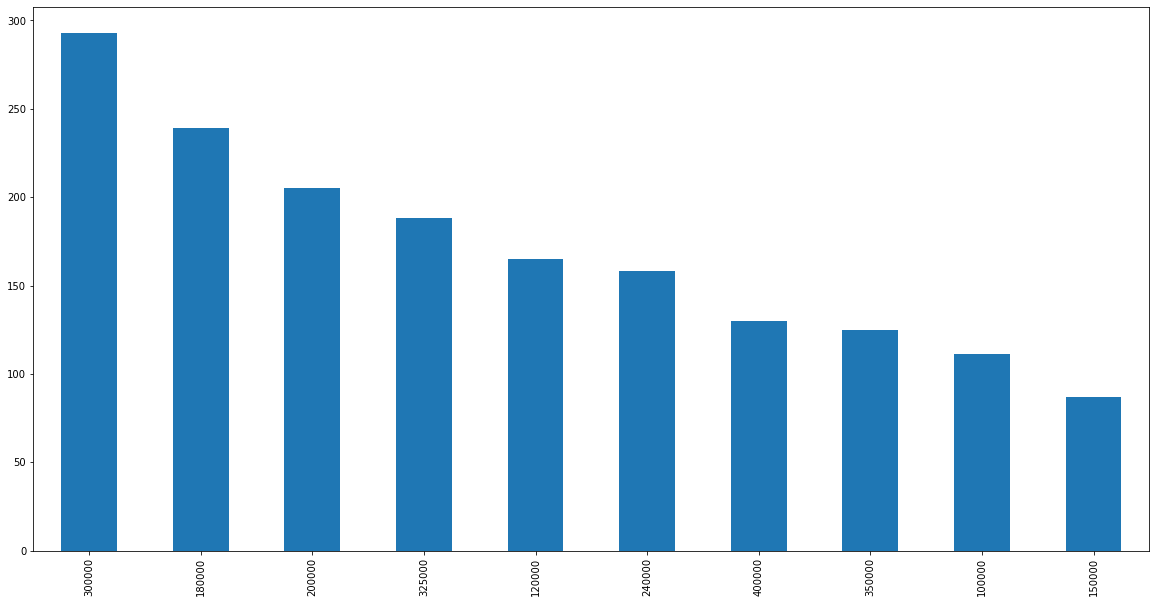

In [132]:
plt.figure(figsize=(20,10))
city=df['Salary'].value_counts()[:10].plot.bar()
plt.show()

Observation:293 Employees are having the  highest salary of 3lkh per annum. 

In [133]:
df['Salary'][:20]

0      420000
1      500000
2      325000
3     1100000
4      200000
5      300000
6      300000
7      400000
8      600000
9      230000
10     600000
11     450000
12     270000
13     200000
14     300000
15     350000
16     325000
17     250000
18     120000
19     325000
Name: Salary, dtype: int64

In [134]:
df['Salary'].mean()

307699.8499249625

In [135]:
df['Salary'].value_counts()[:20]

300000    293
180000    239
200000    205
325000    188
120000    165
240000    158
400000    130
350000    125
100000    111
150000     87
360000     75
320000     74
450000     67
145000     64
500000     63
335000     61
310000     61
330000     57
250000     56
220000     54
Name: Salary, dtype: int64

# BAR PLOT ON DESIGNATION

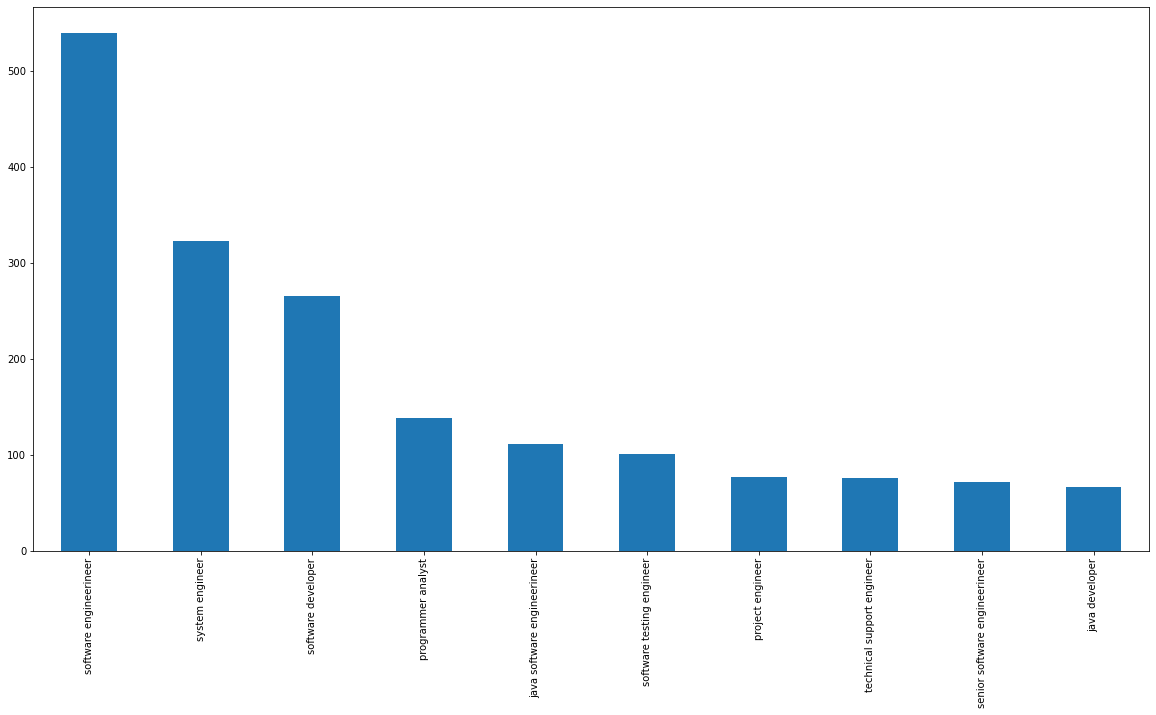

In [136]:
plt.figure(figsize=(20,10))
city=df['Designation'].value_counts()[:10].plot.bar()
plt.show()

Observation:software engineeineer(540) are the highest count of designation.

In [137]:
df['Designation'].value_counts()

software engineerineer          540
system engineer                 323
software developer              266
programmer analyst              139
java software engineerineer     111
                               ... 
process control engineer          1
windows system administrator      1
senior project engineer           1
quality control inspector         1
jr. software developer            1
Name: Designation, Length: 400, dtype: int64

# BAR PLOT ON JOBCITY

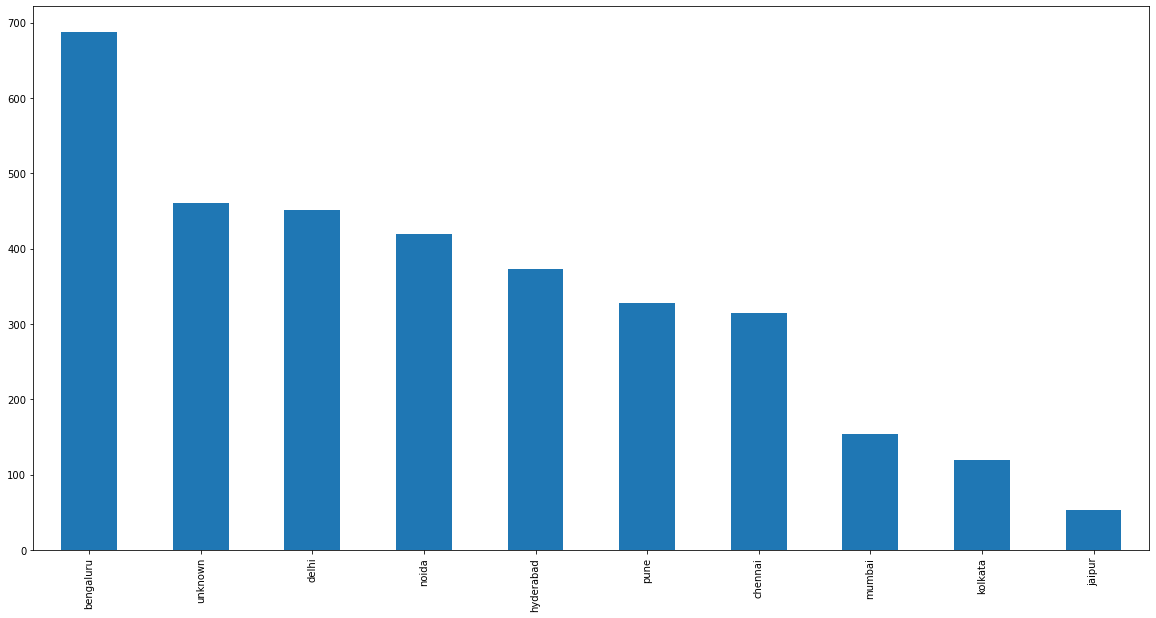

In [138]:
plt.figure(figsize=(20,10))
city=df['JobCity'].value_counts()[:10].plot.bar()
plt.show()

observation:bengaluru is having 687 employees.

In [139]:
df['JobCity'].value_counts()

bengaluru                                 687
unknown                                   461
delhi                                     451
noida                                     419
hyderabad                                 373
                                         ... 
sadulpur,rajgarh,distt-churu,rajasthan      1
bundi                                       1
ncr                                         1
ganjam                                      1
haryana                                     1
Name: JobCity, Length: 190, dtype: int64

# COUNT PLOT FOR GENDER

(0.0, 4000.0)

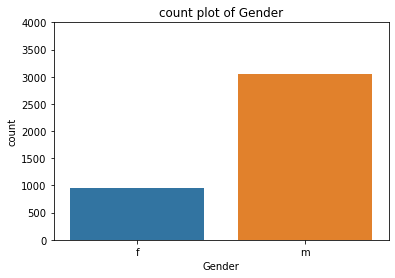

In [140]:
sns.countplot(df['Gender'])
plt.title('count plot of Gender')
plt.ylim((0,4000))

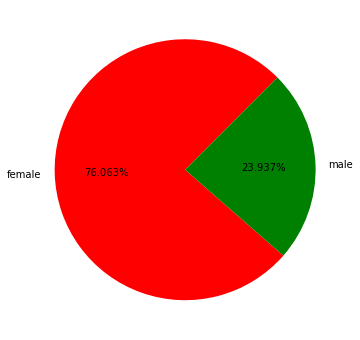

In [141]:
plt.figure(figsize=(12,6))
colors = ['r','g']
label=['female','male']
plt.pie(df['Gender'].value_counts().iloc[:2],labels=label,startangle=45,colors=colors,autopct='%1.3f%%')
plt.show()

In [142]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

# BAR PLOT FOR DOJ

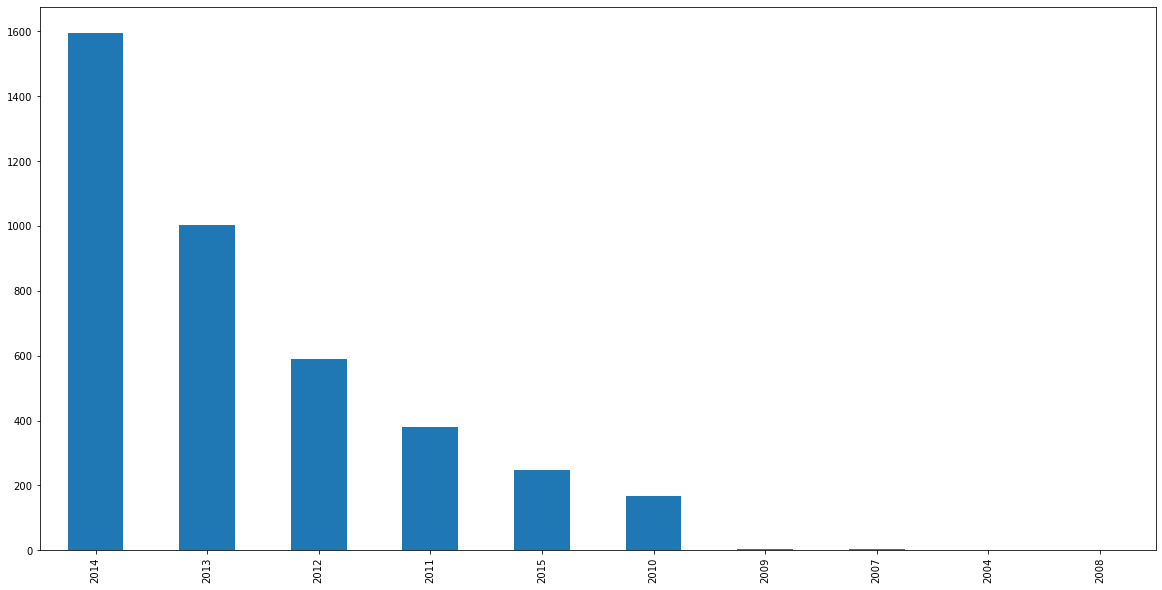

In [143]:
plt.figure(figsize=(20,10))
city=df['DOJ'].value_counts()[:10].plot.bar()
plt.show()

In [144]:
df['DOJ'].value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

# DISTRIBUTION PLOTS FOR 10PERCENTAGE,12PERCENTAGE

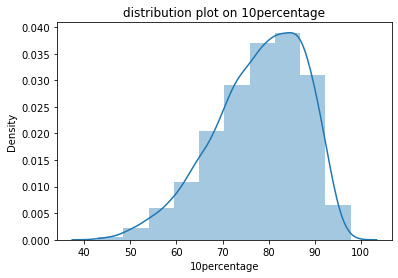

In [145]:
sns.distplot(df['10percentage'],bins=10)
plt.title('distribution plot on 10percentage')
plt.show()

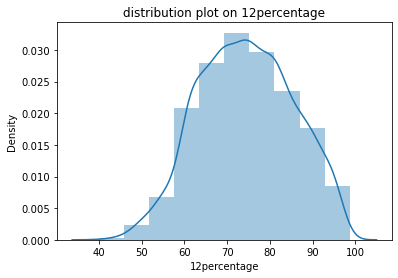

In [146]:
sns.distplot(df['12percentage'],bins=10)
plt.title('distribution plot on 12percentage')
plt.show()

# COUNT PLOT FOR 10BOARD AND 12BOARD

(0.0, 3000.0)

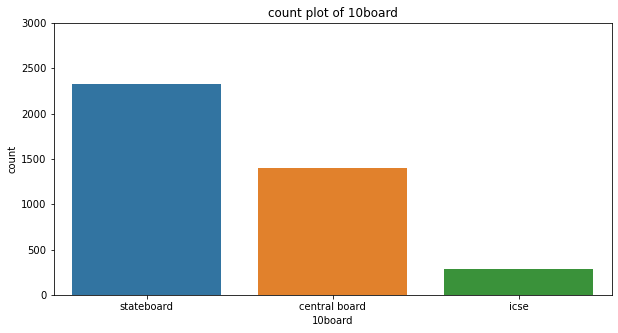

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(df['10board'])
plt.title('count plot of 10board')
plt.ylim((0,3000))

In [148]:
df['10board'].value_counts()

stateboard       2322
central board    1395
icse              281
Name: 10board, dtype: int64

(0.0, 3000.0)

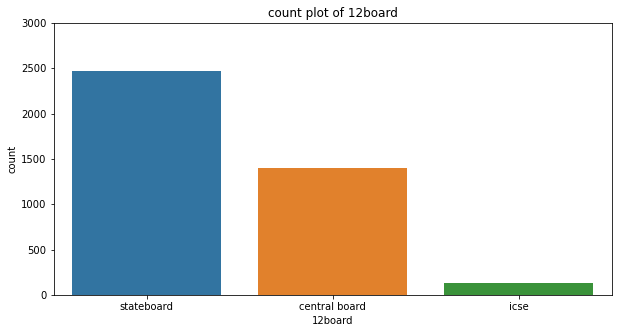

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(df['12board'])
plt.title('count plot of 12board')
plt.ylim((0,3000))

In [150]:
df['12board'].value_counts()

stateboard       2469
central board    1400
icse              129
Name: 12board, dtype: int64

# COUNT PLOT FOR DEGREE

(0.0, 4000.0)

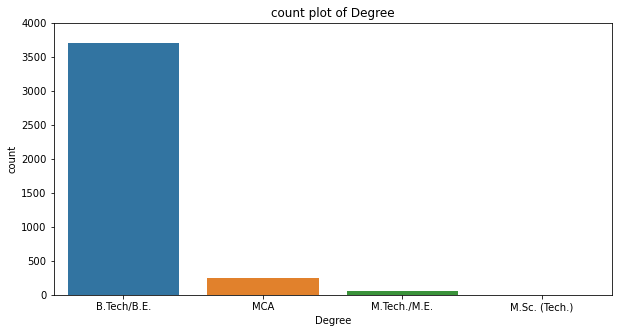

In [151]:
plt.figure(figsize=(10,5))
sns.countplot(df['Degree'])
plt.title('count plot of Degree')
plt.ylim((0,4000))

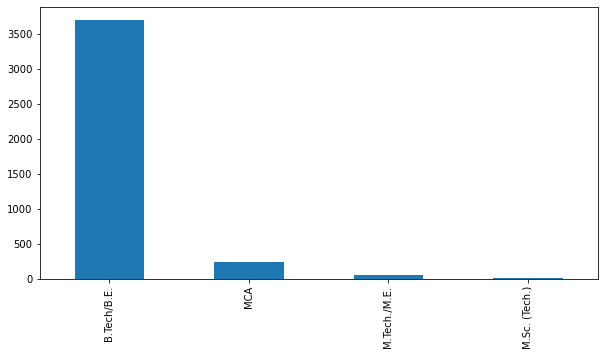

In [152]:
plt.figure(figsize=(10,5))
city=df['Degree'].value_counts().plot.bar()
plt.show()

In [153]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

# BAR  PLOT FOR SPECIALIZATION

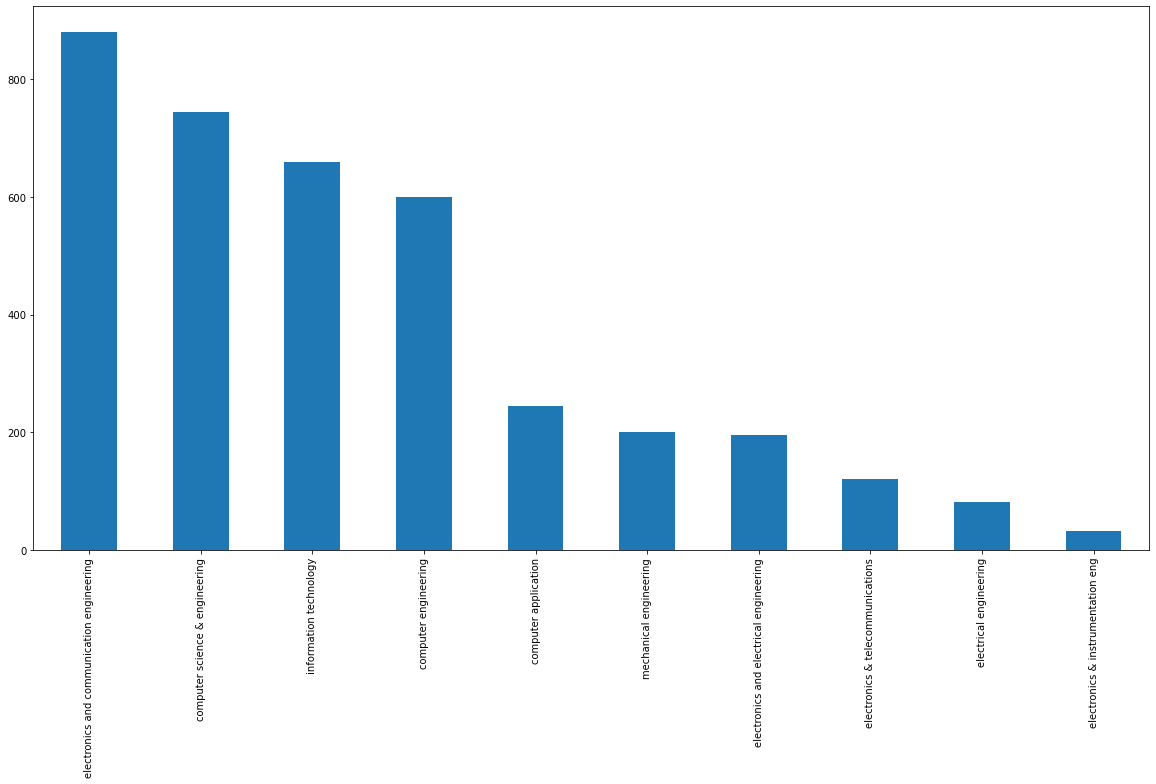

In [154]:
plt.figure(figsize=(20,10))
city=df['Specialization'].value_counts()[:10].plot.bar()
plt.show()

In [155]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

# COUNT PLOT ON COLLEGEGPA

(0.0, 4.0)

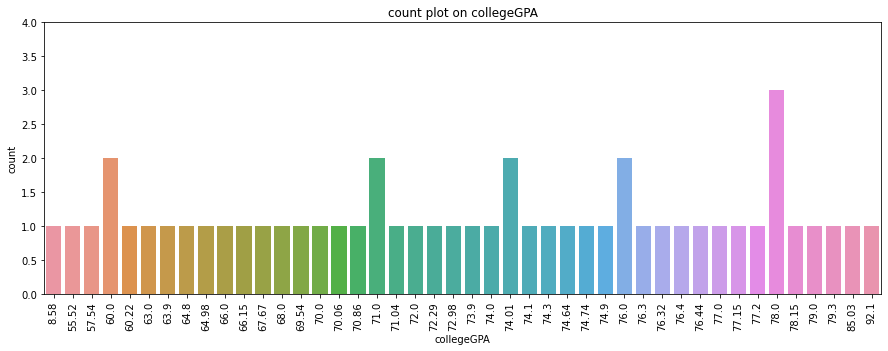

In [156]:
plt.figure(figsize=(15,5))
sns.countplot(df[:50]['collegeGPA'])
plt.title('count plot on collegeGPA')
plt.xticks(rotation=90);
plt.ylim((0,4))

In [157]:
df['collegeGPA'].value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
71.00     75
        ... 
71.68      1
73.15      1
90.01      1
71.36      1
70.42      1
Name: collegeGPA, Length: 1282, dtype: int64

# BAR PLOT ON ENGLISH(AMCAT SCORE)

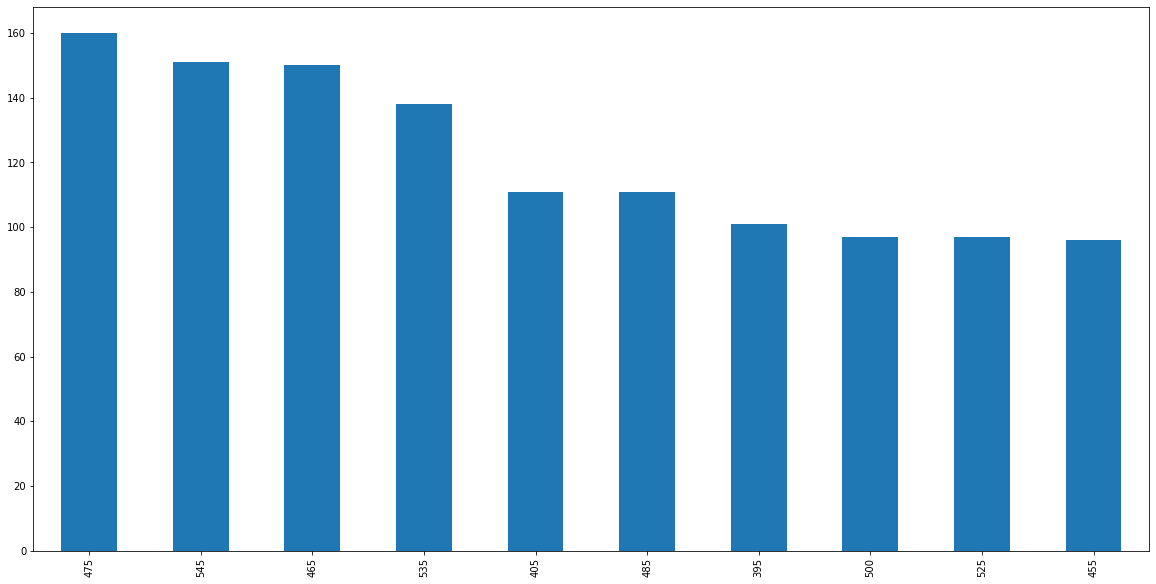

In [158]:
plt.figure(figsize=(20,10))
city=df['English'].value_counts()[:10].plot.bar()
plt.show()

In [159]:
df['English'].value_counts()

475    160
545    151
465    150
535    138
405    111
      ... 
180      1
875      1
825      1
870      1
334      1
Name: English, Length: 111, dtype: int64

# BAR PLOT ON QUANT(AMCAT SCORE)

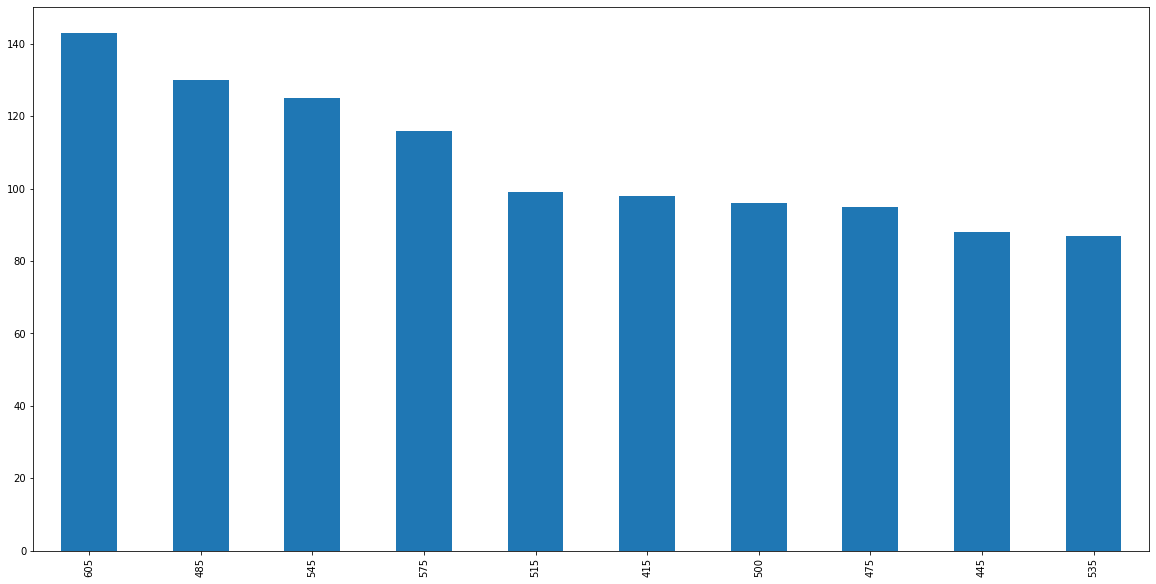

In [160]:
plt.figure(figsize=(20,10))
city=df['Quant'].value_counts()[:10].plot.bar()
plt.show()

In [161]:
df['Quant'].value_counts()

605    143
485    130
545    125
575    116
515     99
      ... 
805      1
175      1
214      1
860      1
394      1
Name: Quant, Length: 138, dtype: int64

# BAR PLOT ON LOGICAL(AMCAT SCORE)

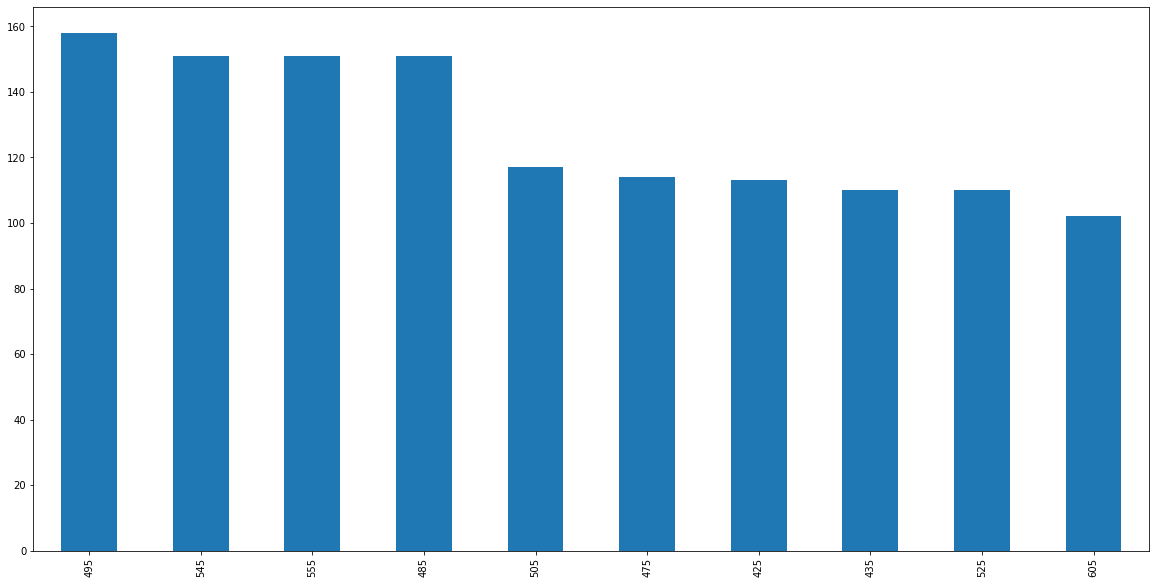

In [162]:
plt.figure(figsize=(20,10))
city=df['Logical'].value_counts()[:10].plot.bar()
plt.show()

In [163]:
df['Logical'].value_counts()

495    158
545    151
555    151
485    151
505    117
      ... 
310      1
795      1
534      1
454      1
660      1
Name: Logical, Length: 107, dtype: int64

# BAR PLOT ON AGE

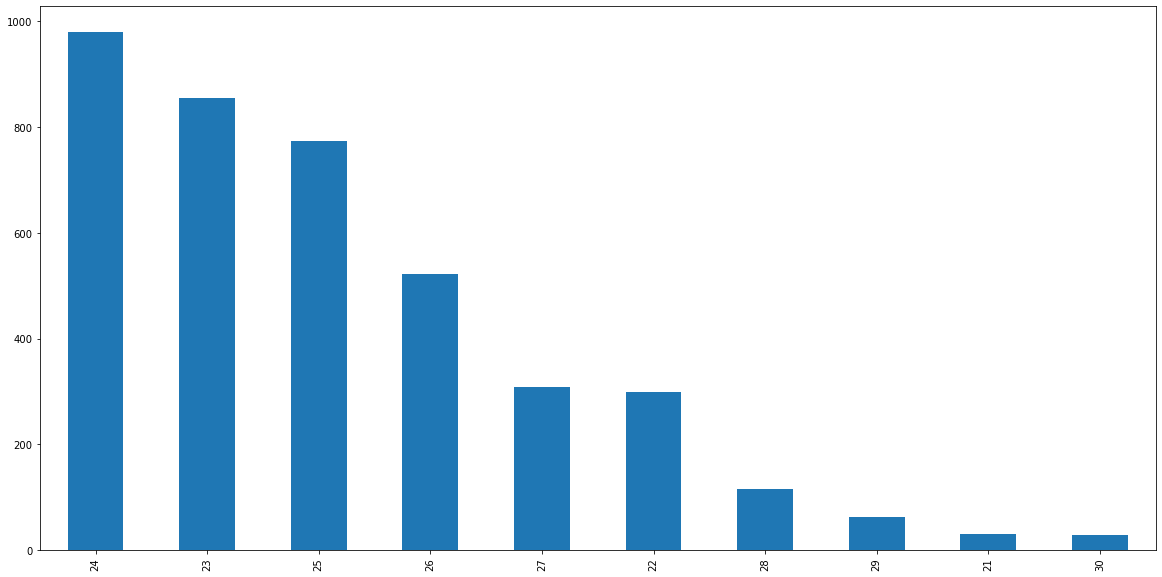

In [164]:
plt.figure(figsize=(20,10))
city=df['age'].value_counts()[:10].plot.bar()
plt.show()

In [165]:
df['age'].value_counts()

24    979
23    855
25    774
26    522
27    308
22    299
28    116
29     62
21     31
30     28
31     13
32      4
20      2
33      2
38      1
18      1
34      1
Name: age, dtype: int64

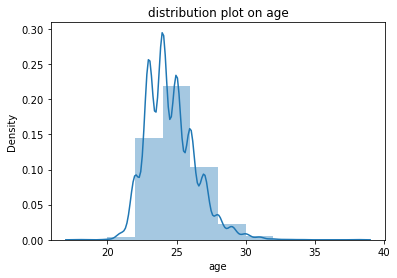

In [166]:
sns.distplot(df['age'],bins=10)
plt.title('distribution plot on age')
plt.show()

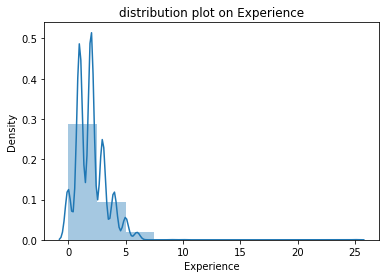

In [167]:
sns.distplot(df['Experience'],bins=10)
plt.title('distribution plot on Experience')
plt.show()

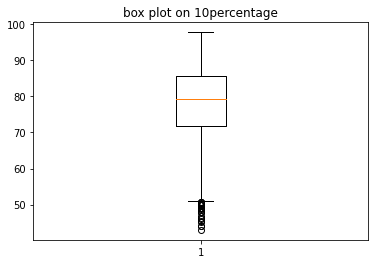

In [168]:
plt.boxplot(df['10percentage'])
plt.title('box plot on 10percentage')
plt.show()

In [169]:
df['10percentage'].mean()

77.9254427213606

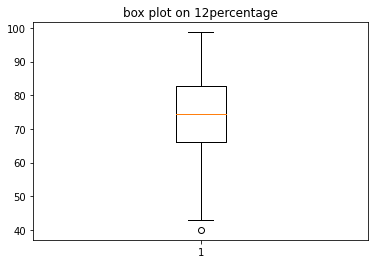

In [170]:
plt.boxplot(df['12percentage'])
plt.title('box plot on 12percentage')
plt.show()

In [171]:
df['12percentage'].mean()

74.46636568284127

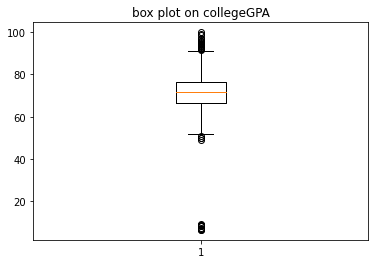

In [172]:
plt.boxplot(df['collegeGPA'])
plt.title('box plot on collegeGPA')
plt.show()

In [173]:
df['collegeGPA'].mean()

71.48617058529268

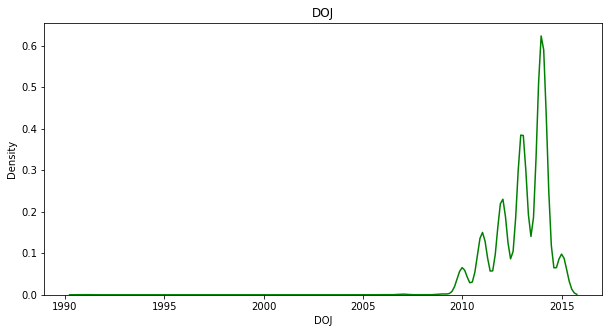

In [174]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['DOJ'],color='g')
plt.title('DOJ')
plt.show()

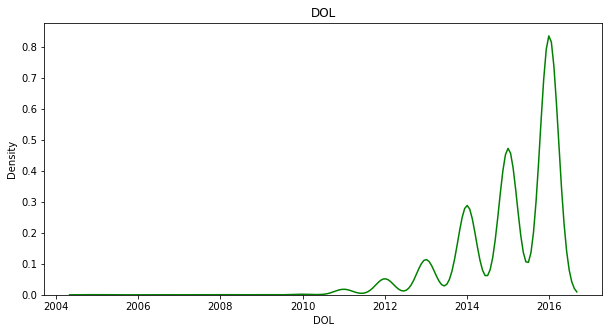

In [175]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['DOL'],color='g')
plt.title('DOL')
plt.show()

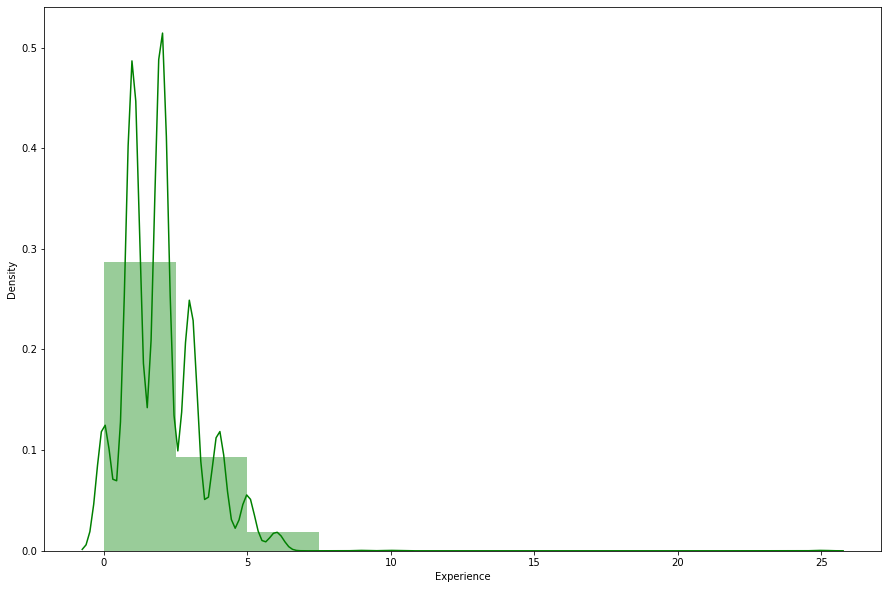

In [176]:
plt.figure(figsize=(15,10))
sns.distplot(df['Experience'],color='g',bins=10)
plt.show()

In [177]:
  df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [178]:
df['collegeGPA'].value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
71.00     75
        ... 
71.68      1
73.15      1
90.01      1
71.36      1
70.42      1
Name: collegeGPA, Length: 1282, dtype: int64

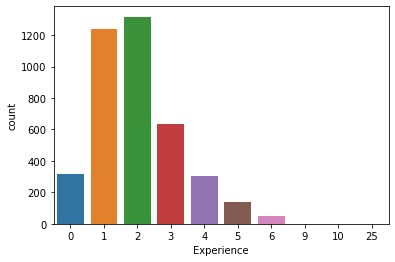

In [179]:
sns.countplot(x='Experience',data=df)
plt.show()


In [180]:
df['Experience'].value_counts()

2     1317
1     1236
3      632
0      319
4      303
5      141
6       47
10       1
25       1
9        1
Name: Experience, dtype: int64

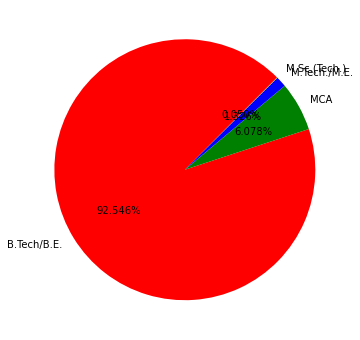

In [181]:
plt.figure(figsize=(12,6))
colors = ['r','g','b','y']
label=['B.Tech/B.E.','MCA','M.Tech./M.E.','M.Sc.(Tech.)']
plt.pie(df['Degree'].value_counts().iloc[:4],labels=label,startangle=45,colors=colors,autopct='%1.3f%%')
plt.show()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   DOJ                    3998 non-null   int32  
 2   DOL                    3998 non-null   int32  
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  Degree                 3998 non-null   object 
 13  Specialization         3998 non-null   object 
 14  collegeGPA             3998 non-null   float64
 15  Coll

In [183]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [184]:
a = ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
b = [3130,1144,902,235,116,374,42]

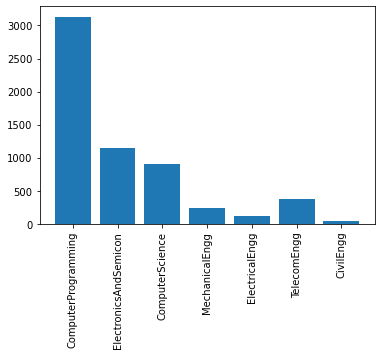

In [185]:
plt.bar(a,b)
plt.xticks(rotation = 90)
plt.show()

# 2.BI-VARIENT ANALYSIS

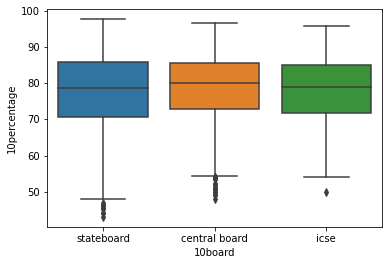

In [186]:
sns.boxplot(y="10percentage",x="10board",data=df)
plt.show()

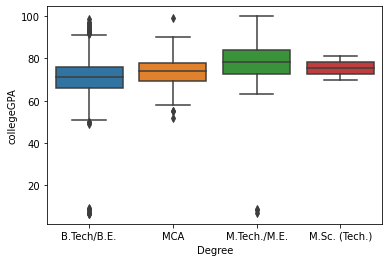

In [187]:
sns.boxplot(y="collegeGPA",x="Degree",data=df)
plt.show()

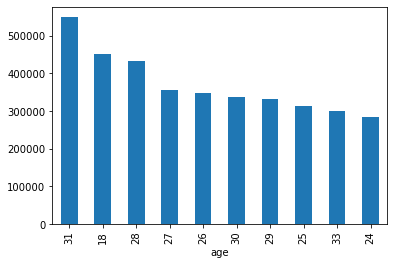

In [188]:
df.groupby('age')['Salary'].mean().nlargest(10).plot(kind = 'bar')
plt.show()


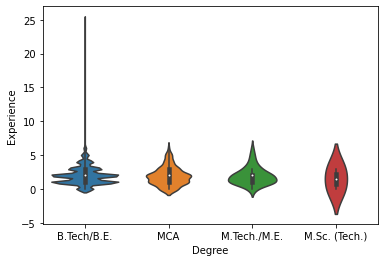

In [189]:
sns.violinplot(x='Degree',y='Experience',data=df)
plt.show()

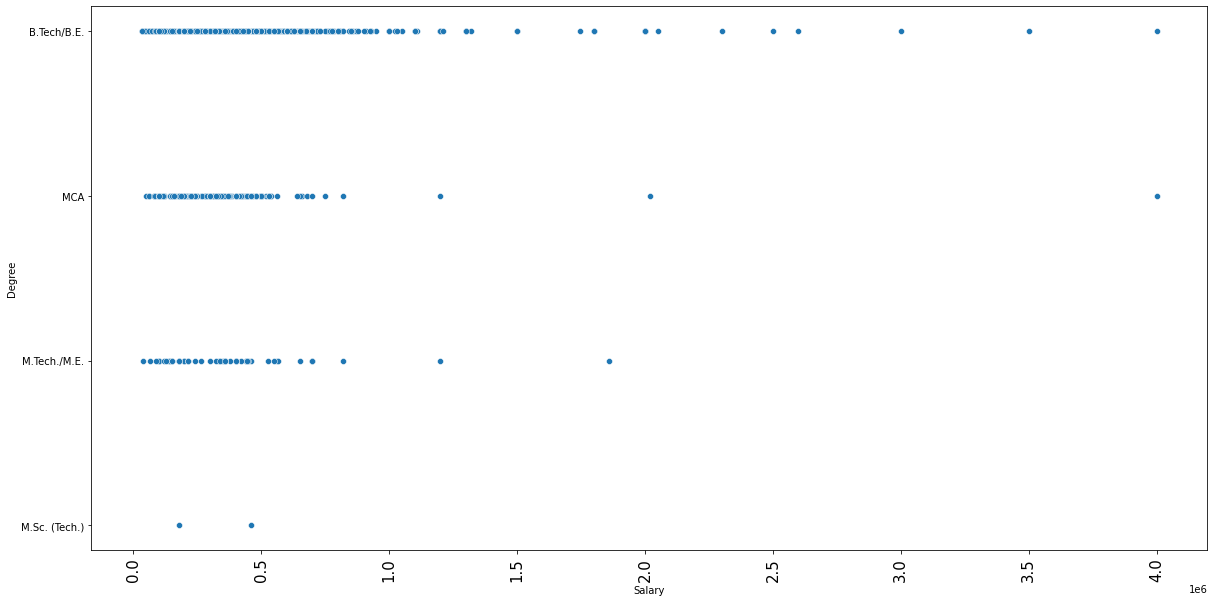

In [190]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Salary',y='Degree',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.show()

In [191]:
df['Salary'].value_counts()

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64

In [192]:
df['DOJ'].value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

In [193]:
df1 = df[df['age']>25]

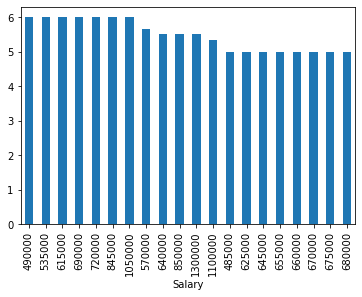

In [194]:
df1.groupby('Salary')['Experience'].mean().nlargest(20).plot(kind = 'bar')
plt.show()

In [195]:
df2 = df[df['age']>30]

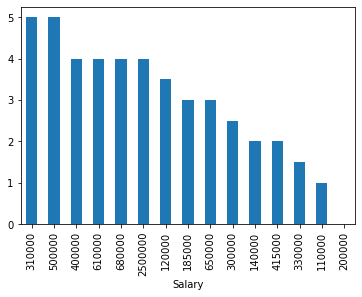

In [196]:
df2.groupby('Salary')['Experience'].mean().nlargest(20).plot(kind = 'bar')
plt.show()

In [197]:
df3 = df[df['age']>33]

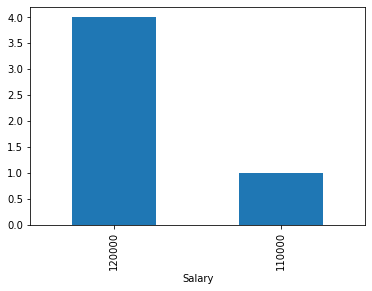

In [198]:
df3.groupby('Salary')['Experience'].mean().nlargest(20).plot(kind = 'bar')
plt.show()

In [199]:
df['age'].value_counts()

24    979
23    855
25    774
26    522
27    308
22    299
28    116
29     62
21     31
30     28
31     13
32      4
20      2
33      2
38      1
18      1
34      1
Name: age, dtype: int64

# 3.MULTI-VARIENT ANALYSIS

# PAIR PLOT

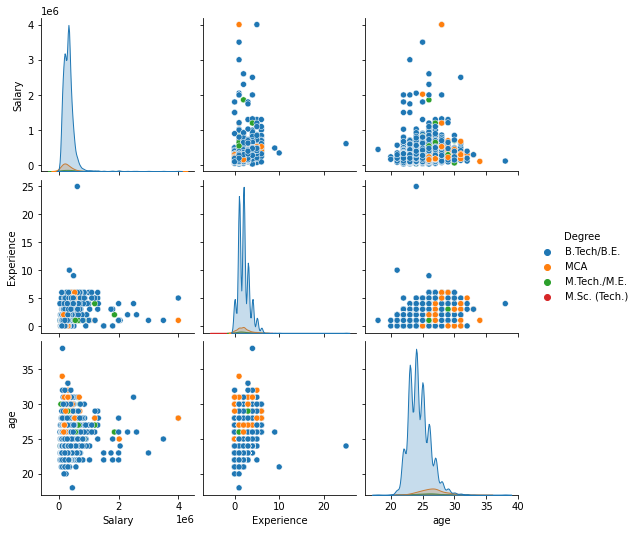

In [200]:
sns.pairplot(df,x_vars=['Salary','Experience','age'],y_vars=['Salary','Experience','age'],hue='Degree')
plt.show()

In [201]:
df.mean()

Salary                   3.076998e+05
DOJ                      2.013039e+03
DOL                      2.015042e+03
DOB                               inf
10percentage             7.792544e+01
12graduation             2.008088e+03
12percentage             7.446637e+01
collegeGPA               7.148617e+01
GraduationYear           2.012106e+03
English                  5.016491e+02
Logical                  5.015988e+02
Quant                    5.133782e+02
Domain                   5.720204e-01
ComputerProgramming      3.533199e+02
ElectronicsAndSemicon    9.604227e+01
ComputerScience          9.151676e+01
MechanicalEngg           2.391596e+01
ElectricalEngg           1.743847e+01
TelecomEngg              3.275763e+01
CivilEngg                3.673337e+00
conscientiousness       -3.783129e-02
agreeableness            1.464958e-01
extraversion             2.762981e-03
nueroticism             -1.690326e-01
openess_to_experience   -1.381102e-01
age                      2.457254e+01
Experience  

In [202]:
df.median()

Salary                   300000.000000
DOJ                        2013.000000
DOL                        2015.000000
DOB                        1991.000000
10percentage                 79.150000
12graduation               2008.000000
12percentage                 74.400000
collegeGPA                   71.720000
GraduationYear             2013.000000
English                     500.000000
Logical                     505.000000
Quant                       515.000000
Domain                        0.622643
ComputerProgramming         415.000000
ElectronicsAndSemicon         0.000000
ComputerScience               0.000000
MechanicalEngg                0.000000
ElectricalEngg                0.000000
TelecomEngg                   0.000000
CivilEngg                     0.000000
conscientiousness             0.046400
agreeableness                 0.212400
extraversion                  0.091400
nueroticism                  -0.234400
openess_to_experience        -0.094300
age                      

In [203]:
df.mode().T

,0
Salary,300000
DOJ,2014
DOL,2016
Designation,software engineerineer
JobCity,bengaluru
Gender,m
DOB,1991
10percentage,78.0
10board,stateboard
12graduation,2009


In [204]:
df.var()

Salary                   4.525724e+10
DOJ                      1.764571e+00
DOL                      1.376768e+00
10percentage             9.702570e+01
12graduation             2.734391e+00
12percentage             1.209985e+02
collegeGPA               6.670540e+01
GraduationYear           1.014886e+03
English                  1.101241e+04
Logical                  7.531341e+03
Quant                    1.495786e+04
Domain                   9.148233e-02
ComputerProgramming      4.201726e+04
ElectronicsAndSemicon    2.490292e+04
ComputerScience          3.057870e+04
MechanicalEngg           9.583097e+03
ElectricalEngg           7.637724e+03
TelecomEngg              1.093463e+04
CivilEngg                1.336564e+03
conscientiousness        1.058153e+00
agreeableness            8.869536e-01
extraversion             9.052979e-01
nueroticism              1.015217e+00
openess_to_experience    1.016214e+00
age                      3.123959e+00
Experience               1.756056e+00
dtype: float

In [205]:
df.std()

Salary                   212737.499957
DOJ                           1.328372
DOL                           1.173357
10percentage                  9.850162
12graduation                  1.653599
12percentage                 10.999933
collegeGPA                    8.167338
GraduationYear               31.857271
English                     104.940021
Logical                      86.783297
Quant                       122.302332
Domain                        0.302460
ComputerProgramming         204.981129
ElectronicsAndSemicon       157.806602
ComputerScience             174.867677
MechanicalEngg               97.893295
ElectricalEngg               87.394072
TelecomEngg                 104.568796
CivilEngg                    36.559052
conscientiousness             1.028666
agreeableness                 0.941782
extraversion                  0.951471
nueroticism                   1.007580
openess_to_experience         1.008075
age                           1.767473
Experience               

In [206]:
df.Salary.mean()

307699.8499249625

In [207]:
df.Experience.mean()

2.0032516258129065

In [208]:
df.age.mean()

24.572536268134066

In [209]:
df.collegeGPA.mean()

71.48617058529268

In [210]:
df.DOJ.mean()

2013.0387693846924

In [211]:
df.DOL.mean()

2015.0420210105053

In [212]:
df.GraduationYear.mean()

2012.1058029014507

In [213]:
Sample1 = df.sample(100)

In [214]:
Sample1['Experience'].mean()

1.9

In [215]:
df.Logical.mean()

501.59879939969983

In [216]:
Sample1 = df.sample(100)

In [217]:
Sample1.Logical.mean()

501.9

In [218]:
import random

In [219]:
N=2000
n=100
samplemean=[]
for i in range(N):
    samplemean.append(np.mean(random.sample(list(df['Experience']),n)))




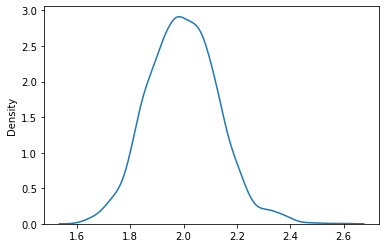

In [220]:
sns.kdeplot(samplemean)
plt.show()

In [221]:
df['Experience'].value_counts()

2     1317
1     1236
3      632
0      319
4      303
5      141
6       47
10       1
25       1
9        1
Name: Experience, dtype: int64

In [222]:
sample_size=10
salary_sample=np.random.choice(df['Salary'],sample_size)

In [223]:
salary_sample

array([ 500000,  340000,  380000,  260000,  350000,  250000,  600000,
        700000,  200000, 1200000], dtype=int64)

In [224]:
from scipy.stats import ttest_1samp

import random


In [225]:
ttest,p_value=ttest_1samp(salary_sample,307699.8499249625)


In [226]:
print(p_value)

0.1057902847547302
